###Codes for Final Project
Understanding Water Quality in the Main Arm of the Fraser River

In [126]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

#stats library

import statsmodels.api as sm
import scipy

#The function below is used to show the plots within the notebook

%matplotlib inline

In [91]:
#Check version of pandas library
pd.__version__

'0.17.0'

In [93]:
#Path from which the data is retrieved
filepath= '../data/Fraser_River_Water_Data.csv'

def load_water_quality_data():
    '''This function loads the dataset required to complete this project.'''
    
    #Function used load data
    water_quality_data= pd.read_csv(filepath, delimiter= ',')
    
    return(water_quality_data)

In [94]:
#Print the head of the data set
load_water_quality_data().head()

,Sample time,Sample number,Sample type,Arsenic Dissolved [Lab: 1] [VMV: 107942],Status(0),Unit code(0),Value modifier code(0),Carbon Dissolved Organic [Lab: -54] [VMV: 1067],Status(1),Unit code(1),...,Unit code(13),Value modifier code(13),Temperature Water [Lab: 80] [VMV: 1125],Status(14),Unit code(14),Value modifier code(14),Temperature Water [Lab: -54] [VMV: 1125],Status(15),Unit code(15),Value modifier code(15)
0,2008-08-27 21:50:00,08PY001319,1,NaN,NaN,NaN,NaN,8.2,U,MG/L,...,NaN,NaN,16,U,DEG C,NaN,NaN,NaN,NaN,NaN
1,2008-09-03 00:25:00,08PY001043,1,NaN,NaN,NaN,NaN,2.0,U,MG/L,...,NaN,NaN,16,U,DEG C,NaN,NaN,NaN,NaN,NaN
2,2008-09-17 22:15:00,08PY001061,1,NaN,NaN,NaN,NaN,2.9,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-09-30 20:30:00,08PY001124,1,NaN,NaN,NaN,NaN,1.6,U,MG/L,...,NaN,NaN,14,U,DEG C,NaN,NaN,NaN,NaN,NaN
4,2008-10-15 19:24:00,08PY001200,1,NaN,NaN,NaN,NaN,4.7,U,MG/L,...,NaN,NaN,11,U,DEG C,NaN,NaN,NaN,NaN,NaN


In [95]:
#Import pasty library to run data

from patsy import dmatrices
from patsy.builtins import *


In [129]:

def extract_and_drop_data():
    
    '''This function extracts the variables needed, drop the NaN values and rename these columns such 
    as to eliminate patsy error'''
    
    #Extract variables to be analyzed for assignment
    fraser_water_quality_testing=load_water_quality_data()[['Sample time', 'Temperature Water [Lab: 80] [VMV: 1125]',
                                                          'Oxygen Dissolved [Lab: -54] [VMV: 1124]']]
    
    #Remove the NaN from the dataset
    water_quality_DO=fraser_water_quality_testing.dropna()
    
    #Change column names to eliminate the possibility of patsy error when doing linear regression
    water_quality_DO2= water_quality_DO.rename(columns={'Sample time': 'Sample_time','Temperature Water [Lab: 80] [VMV: 1125]':'Temperature_Lab80',
                                                    'Oxygen Dissolved [Lab: -54] [VMV: 1124]':'Oxygen_Dissolved_Lab-54'})
    return water_quality_DO2

In [132]:
#Use the defined function to rename column names and drop empty values

edited_columns=extract_and_drop_data()

In [137]:
#Print a new dataframe with the munged data
edited_columns

,Sample_time,Temperature_Lab80,Oxygen_Dissolved_Lab-54
49,2012-04-27 21:40:00,7.5,12.00
53,2012-07-13 20:40:00,16.5,10.50
64,2013-05-03 19:30:00,7.5,12.70
69,2013-07-11 18:35:00,17.5,10.15
70,2013-07-25 18:00:00,19.5,9.38
73,2013-09-04 19:10:00,20.0,9.05
74,2013-09-17 19:25:00,20.6,8.96
75,2013-10-02 20:45:00,12.2,9.70


In [283]:
def linear_model(x,y):
    '''This function is used to create a linear regression for x and y variables in the dataset.
    The input for the function are the x and y variables while the output is a 
    linear model that represents these variables'''
    
    #Define the x and y variables
    y= 'Oxygen_Dissolved_Lab-54'
    x= 'Temperature_Lab80'
    
    #General form for the linear model formula, this would be used with the defined variable
    lm= sm.formula.ols(formula= "Q('" + y + "') ~ Q('" + x + "')", data= edited_columns).fit()
    
    # Used to predict function we make a data frame, therefore below we have data frame that is used to make dataframe
    x_new=pd.DataFrame({'Temperature_Lab80': range(1,700)})
    
    # create a predict function to calculate linear model
    y_preds=lm.predict(x_new)
    
    return lm
    return x_new
    return y_preds
    

In [271]:
#Create a variable for the parameters of the linear model 
parameters_linear_model=linear_model('Temperature_Lab80','Oxygen_Dissolved_Lab-54').params

In [272]:
#Print the parameters of the linear model
parameters_linear_model

Intercept                 13.780598
Q('Temperature_Lab80')    -0.229223
dtype: float64

In [273]:
#Create a summary for linear model 
summary_of_linear_model=linear_model('Temperature_Lab80','Oxygen_Dissolved_Lab-54').summary()

C:\Users\Jhanelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  int(n))


In [260]:
#Print the summary of the linear model values
summary_of_linear_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('Oxygen_Dissolved_Lab-54')   R-squared:                       0.812
Model:                                      OLS   Adj. R-squared:                  0.781
Method:                           Least Squares   F-statistic:                     25.96
Date:                          Tue, 17 Nov 2015   Prob (F-statistic):            0.00223
Time:                                  21:25:17   Log-Likelihood:                -6.6875
No. Observations:                             8   AIC:                             17.37
Df Residuals:                                 6   BIC:                             17.53
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 13.7806      0.719     19.159      0.000        12.021    15.541
Q('Temperature_Lab80')    -0.2292      0.045     -5.095      0.002        -0.339    -0.119
==============================================================================
Omnibus:                        7.204   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.168
Skew:                          -1.207   Prob(JB):                        0.338
Kurtosis:                       3.823   Cond. No.                         50.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Jhanelle\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


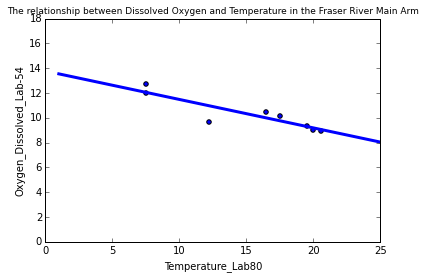

In [300]:
#Create the dimensions of the figure size for the plot created
plt.figure(figsize=(20,20))

#Plot the linear model for the dataset
plot_water_quality= edited_columns.plot(kind='scatter', x='Temperature_Lab80', y="Oxygen_Dissolved_Lab-54")

#Create the x limits for the graph
plt.xlim(0,25)

#Create the y limits for the graph
plt.ylim(0,18)

#Define the y_preds variable
y_preds=linear_model('Temperature_Lab80','Oxygen_Dissolved_Lab-54').predict(x_new)

#Create a plot that displays the linear model
plt.plot(x_new, y_preds, c='blue', linewidth=3)

#Set title for the linear regression model
plt.title('The relationship between Dissolved Oxygen and Temperature in the Fraser River Main Arm', fontsize=9)

#Save the linear model plot
plt.savefig('../results/Fraser_River_Water_Quality_Graph_01.pdf')

plt.show()